<a href="https://colab.research.google.com/github/bdugick89/Data-Science-Bootcamp/blob/main/Brannon_Dugick_Project_1_Naive_Bayes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Successful Transaction Predictions:
Project 1
Naives Bayes Binary Classification Transaction Data

---
Brannon Dugick - March 12, 2024


## Problem Definition


The goal In this project, we want to predict whether or not a future customer will make a transaction based on their transaction data.  This is a binary classification problem since the result is a binary answer like:is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?.  This project will use Naive Bayes classification.  

## Data Collection/Sources


This data comes from [S3 Bucket Transactions](http://ddc-datascience.s3-website-us-west-1.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv).

The data has a shape of (180000, 53). The following is the data definition:

| Column | Description |
|--------|-------------|
| ID_code | Unique identifier for each record |
| target | Target variable |
| var_0 to var_49 | Descriptive variables |

The dataset is anonymized and contains one target column and 49 fields with a naming convention prefixed by `var_` followed by the column number in an ascending count from 0 to 49. All data is discrete values without the presence of any nulls.


### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from IPython.display import Image


### File Path

In [2]:
base_path = 'http://ddc-datascience.s3-website-us-west-1.amazonaws.com/Projects/Project.1-Transactions/Data/'
train_file = 'Transaction.train.csv'
test_file = 'Transaction.train.csv'

###Concat Paths

In [3]:
train_path = base_path + train_file
test_path = base_path + test_file

### Load Data into Data Frames

In [4]:
train_orig = pd.read_csv(train_path)
test_orig = pd.read_csv(train_path)


##Data Profiling & Cleaning

In [5]:

column_headers_series = pd.Series(train_orig.columns)
print(column_headers_series)


0     Unnamed: 0
1        ID_code
2         target
3          var_0
4          var_1
5          var_2
6          var_3
7          var_4
8          var_5
9          var_6
10         var_7
11         var_8
12         var_9
13        var_10
14        var_11
15        var_12
16        var_13
17        var_14
18        var_15
19        var_16
20        var_17
21        var_18
22        var_19
23        var_20
24        var_21
25        var_22
26        var_23
27        var_24
28        var_25
29        var_26
30        var_27
31        var_28
32        var_29
33        var_30
34        var_31
35        var_32
36        var_33
37        var_34
38        var_35
39        var_36
40        var_37
41        var_38
42        var_39
43        var_40
44        var_41
45        var_42
46        var_43
47        var_44
48        var_45
49        var_46
50        var_47
51        var_48
52        var_49
dtype: object


### Basic Profiling

In [6]:
train_orig.head()


,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [7]:
train_orig.tail()


,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
179995,179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760
179999,179999,train_179999,0,11.6252,3.3959,11.5558,4.2003,7.4666,13.7381,12.9590,...,5.0415,-2.4210,-3.6829,14.2422,1.0741,26.3943,4.1482,11.9539,2.9846,15.6002


#### Meta Data

In [8]:
train_orig.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  180000 non-null  int64  
 1   ID_code     180000 non-null  object 
 2   target      180000 non-null  int64  
 3   var_0       180000 non-null  float64
 4   var_1       180000 non-null  float64
 5   var_2       180000 non-null  float64
 6   var_3       180000 non-null  float64
 7   var_4       180000 non-null  float64
 8   var_5       180000 non-null  float64
 9   var_6       180000 non-null  float64
 10  var_7       180000 non-null  float64
 11  var_8       180000 non-null  float64
 12  var_9       180000 non-null  float64
 13  var_10      180000 non-null  float64
 14  var_11      180000 non-null  float64
 15  var_12      180000 non-null  float64
 16  var_13      180000 non-null  float64
 17  var_14      180000 non-null  float64
 18  var_15      180000 non-null  float64
 19  va

In [9]:
train_orig.shape

(180000, 53)

In [10]:
# Get summary statistics about each column
train_orig.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,180000.0,89999.500000,51961.668564,0.0000,44999.750000,89999.50000,134999.250000,179999.0000
target,180000.0,0.100222,0.300297,0.0000,0.000000,0.00000,0.000000,1.0000
var_0,180000.0,10.678650,3.041036,0.4084,8.451675,10.52675,12.756200,20.3150
var_1,180000.0,-1.630045,4.050519,-15.0434,-4.745600,-1.61125,1.360225,10.3768
var_2,180000.0,10.712922,2.639146,2.1171,8.720000,10.57960,12.514100,19.3530
var_3,180000.0,5.408688,0.866265,2.3473,4.768500,5.38560,6.003200,8.4477
var_4,180000.0,7.566953,1.235043,3.9705,6.618800,7.62850,8.583800,11.1506
var_5,180000.0,14.024017,0.190038,13.4346,13.893900,14.02550,14.164400,14.6545
var_6,180000.0,8.528080,4.641700,-6.0111,5.065750,8.59920,12.273300,22.3315
var_7,180000.0,15.243424,7.851050,-10.6642,9.170200,15.19890,21.010500,41.7480


All data are descrete values.

### Null Value Analysis

In [11]:
train_orig.isna()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
train_orig.isnull().sum()*100

Unnamed: 0    0
ID_code       0
target        0
var_0         0
var_1         0
var_2         0
var_3         0
var_4         0
var_5         0
var_6         0
var_7         0
var_8         0
var_9         0
var_10        0
var_11        0
var_12        0
var_13        0
var_14        0
var_15        0
var_16        0
var_17        0
var_18        0
var_19        0
var_20        0
var_21        0
var_22        0
var_23        0
var_24        0
var_25        0
var_26        0
var_27        0
var_28        0
var_29        0
var_30        0
var_31        0
var_32        0
var_33        0
var_34        0
var_35        0
var_36        0
var_37        0
var_38        0
var_39        0
var_40        0
var_41        0
var_42        0
var_43        0
var_44        0
var_45        0
var_46        0
var_47        0
var_48        0
var_49        0
dtype: int64

No Null Values in entire record set

### Correct data type issues

with Strings present in features defined as floats.

In [13]:
train_orig.drop(columns=['ID_code', 'Unnamed: 0'], inplace=True)


In [14]:
train_orig.reset_index(drop=True, inplace=True)


#### Verify DDL operation

In [15]:
train_orig.info()
## ID_Code & Unnamed: 0 has been removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   target  180000 non-null  int64  
 1   var_0   180000 non-null  float64
 2   var_1   180000 non-null  float64
 3   var_2   180000 non-null  float64
 4   var_3   180000 non-null  float64
 5   var_4   180000 non-null  float64
 6   var_5   180000 non-null  float64
 7   var_6   180000 non-null  float64
 8   var_7   180000 non-null  float64
 9   var_8   180000 non-null  float64
 10  var_9   180000 non-null  float64
 11  var_10  180000 non-null  float64
 12  var_11  180000 non-null  float64
 13  var_12  180000 non-null  float64
 14  var_13  180000 non-null  float64
 15  var_14  180000 non-null  float64
 16  var_15  180000 non-null  float64
 17  var_16  180000 non-null  float64
 18  var_17  180000 non-null  float64
 19  var_18  180000 non-null  float64
 20  var_19  180000 non-null  float64
 21  var_20  18

## Exploratory Data Analysis


### Feature Correlation

#### Pair Plot

#### Heat Map

<Axes: >

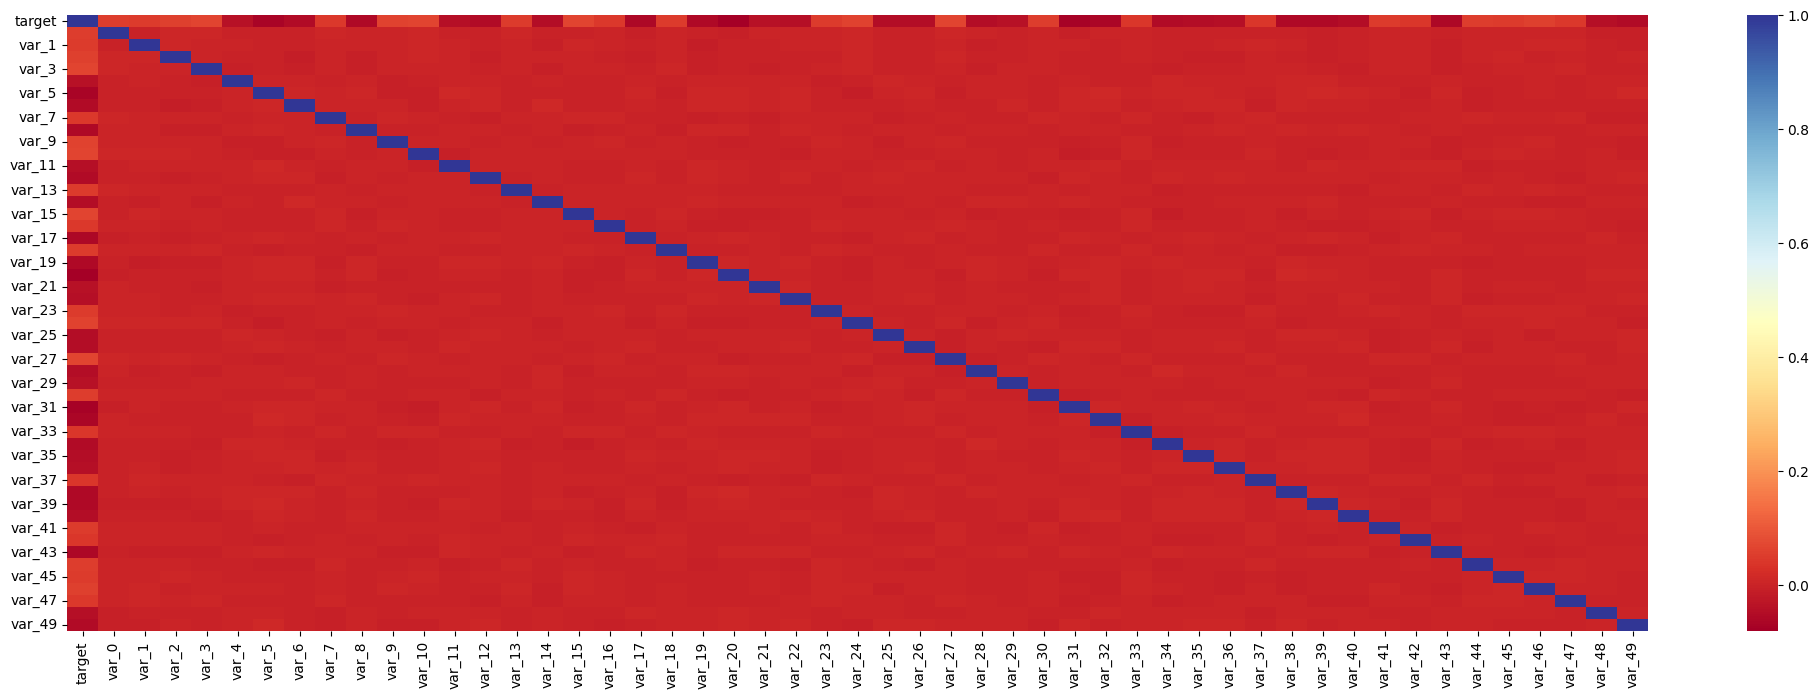

In [16]:
# Calculate the width based on the number of columns
width = 0.5 * train_orig.shape[1]
corr = train_orig.corr()
# Set the figure size
plt.figure(figsize=(width, 8))

# Plot the heatmap
sns.heatmap(corr, cmap='RdYlBu', annot=False)


In [17]:
corr_unstacked = corr.unstack()
corr_unstacked

target  target    1.000000
        var_0     0.052904
        var_1     0.049916
        var_2     0.055450
        var_3     0.066924
                    ...   
var_49  var_45   -0.003859
        var_46   -0.001607
        var_47   -0.000892
        var_48    0.003141
        var_49    1.000000
Length: 2601, dtype: float64

In [18]:
corr_unstacked_not_self = corr_unstacked[ corr_unstacked !=1 ]
corr_unstacked_not_self

target  var_0     0.052904
        var_1     0.049916
        var_2     0.055450
        var_3     0.066924
        var_4    -0.042073
                    ...   
var_49  var_44    0.000081
        var_45   -0.003859
        var_46   -0.001607
        var_47   -0.000892
        var_48    0.003141
Length: 2550, dtype: float64

In [19]:
corr_unstacked_not_self['target'].abs().sort_values(ascending = False)


var_20    0.080689
var_31    0.073296
var_5     0.070015
var_3     0.066924
var_27    0.064868
var_32    0.063871
var_10    0.063565
var_15    0.062887
var_43    0.061291
var_17    0.059906
var_24    0.059306
var_9     0.059227
var_8     0.057378
var_39    0.057373
var_19    0.057320
var_46    0.056902
var_38    0.055704
var_2     0.055450
var_6     0.054375
var_34    0.053733
var_0     0.052904
var_30    0.052457
var_12    0.052324
var_49    0.051718
var_44    0.051110
var_26    0.050278
var_40    0.050049
var_1     0.049916
var_28    0.049551
var_13    0.049072
var_14    0.048623
var_18    0.048392
var_35    0.048198
var_41    0.047948
var_23    0.047569
var_45    0.047543
var_25    0.047005
var_22    0.046433
var_11    0.045516
var_36    0.045513
var_47    0.045506
var_16    0.045281
var_7     0.044769
var_48    0.042765
var_4     0.042073
var_29    0.041987
var_42    0.041593
var_33    0.040520
var_21    0.040311
var_37    0.040147
dtype: float64

In [20]:
# An alternative method for finding the most highly correlated features
corr = train_orig.corr().abs()
corr = corr.melt(
    ignore_index = False,
    var_name = 'feature',
    value_name = 'correlation',
    )
corr = corr[corr['correlation'] != 1]
corr.sort_values(
    'correlation',
    inplace=True,
    ascending=False,
    )
corr[::2].head(10)

,feature,correlation
var_20,target,0.080689
target,var_31,0.073296
var_5,target,0.070015
target,var_3,0.066924
target,var_27,0.064868
target,var_32,0.063871
var_10,target,0.063565
target,var_15,0.062887
var_43,target,0.061291
var_17,target,0.059906


#### High Correlation Ranked


| Rank | Var |
|------|-----|
| 1.   | 20  |
| 2.   | 31  |
| 3.   | 5  |
| 4.   | 3   |
| 5.   | 27   |
| 6.   | 10  |
| 7.   | 15  |




### Overall Average Target

In [21]:
train_orig['target'].value_counts()

0    161960
1     18040
Name: target, dtype: int64

In [22]:
sum(train_orig['target'])*100/len(train_orig['target'])

10.022222222222222

In [23]:
for field in ['var_20', 'var_31', 'var_5', 'var_3', 'var_27', 'var_10', 'var_15']:
    all = train_orig.loc[train_orig['target'] == 1, field]
    target = sum(all)
    total = len(all)
    rate = target*100/total
    print("%s Percent target: %d \n Total target: %d. Total count: %d. \n" % (field, rate, target, total))

var_20 Percent target: 1416 
 Total target: 255539. Total count: 18040. 

var_31 Percent target: 607 
 Total target: 109631. Total count: 18040. 

var_5 Percent target: 1398 
 Total target: 252274. Total count: 18040. 

var_3 Percent target: 558 
 Total target: 100706. Total count: 18040. 

var_27 Percent target: 625 
 Total target: 112901. Total count: 18040. 

var_10 Percent target: -291 
 Total target: -52650. Total count: 18040. 

var_15 Percent target: 615 
 Total target: 110980. Total count: 18040. 



#### Skew Ratio Analysis and Plotting

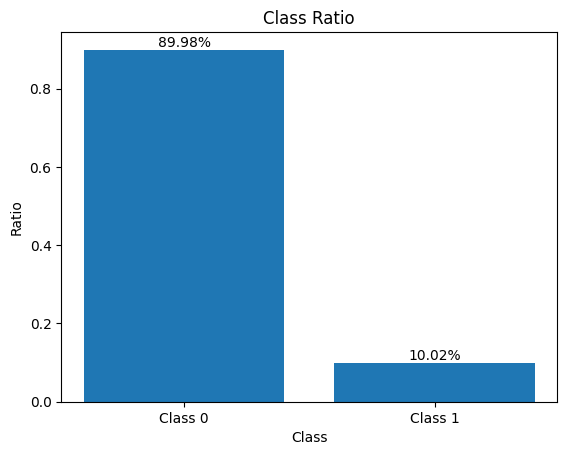

In [24]:
value_counts = train_orig['target'].value_counts()
total_samples = value_counts.sum()
ratio = value_counts / total_samples



# Plotting
plt.bar(ratio.index, ratio.values)
plt.xlabel('Class')
plt.ylabel('Ratio')
plt.title('Class Ratio')
plt.xticks(ratio.index, labels=['Class 0', 'Class 1'])
# Add percentages at the top of each bar
for i, v in enumerate(ratio.values):
    plt.text(i, v, f'{v:.2%}', ha='center', va='bottom')

plt.xticks(ratio.index, labels=['Class 0', 'Class 1'])
plt.show()



Data is heavily skewed to Class 0 and needs to be adjusted in our processing with under or over sampling.

## Processing


###Import Libraries for predictive modeling

In [25]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, metrics, model_selection

gnb = GaussianNB()

##Gaussian Naive Bayes Modeling

#### Separate our features and targets.

In [26]:
y = train_orig['target'].copy()
X = train_orig.drop('target', axis=1, inplace=False)

### Leverage imblearn library to Over and Under sample to correct for our skewed train target

###Fit,Predict, Train

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#fit model
gnb.fit(X_train, y_train)
#predict model
y_pred = gnb.predict(X_test)


# Define the undersampler and oversampler
undersampler = RandomUnderSampler(sampling_strategy=0.5)  # Match 50% of majority class samples
oversampler = RandomOverSampler(sampling_strategy=0.5)  # Match 50% of minority class samples


# Apply undersampling
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# Apply oversampling
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)


###Initial Results

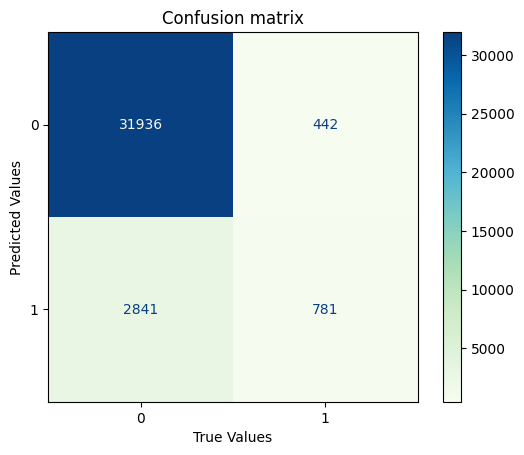

In [28]:
metrics.ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap='GnBu',
)
plt.grid(False)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title('Confusion matrix') ;


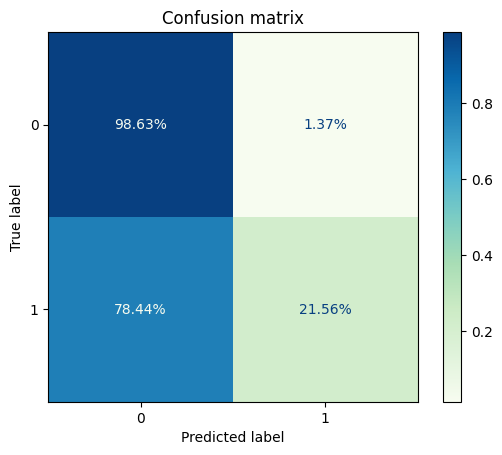

In [29]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')

## Cross-Validation


In [30]:
def cross_validate(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

In [31]:
accuracy_scores = cross_validate(X, y, 1000)
print(round(accuracy_scores.mean(), 5))

0.91122


##Accuracy Score

We are seeing an accuracy score of 90% for 1000 runs.

## Data Visualization/Communication of Results


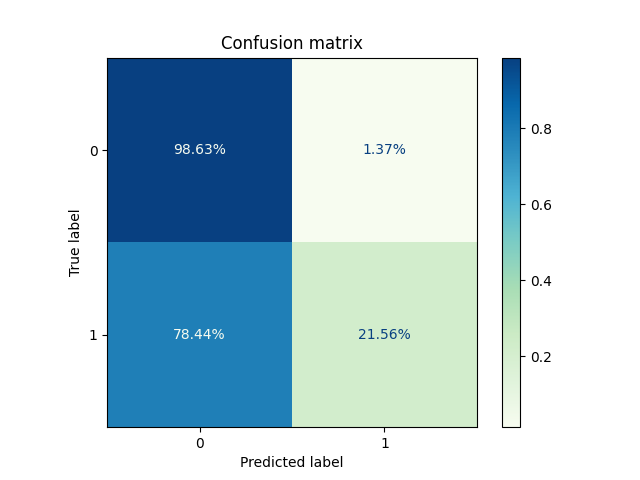

In [32]:
Image('confusion_matrix.png')

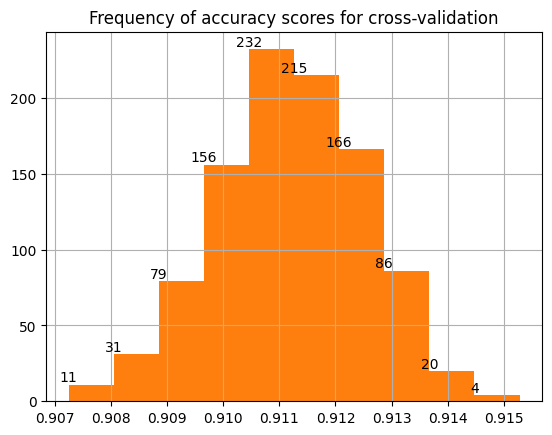

In [33]:
plt.hist(accuracy_scores)
plt.title('Frequency of accuracy scores for cross-validation')

# Get the frequency counts for each bin in the histogram
counts, bins, _ = plt.hist(accuracy_scores)

# Add text annotations for column totals on top of each bar
for count, x in zip(counts, bins):
    plt.text(x, count, str(int(count)), ha='center', va='bottom')

# Enable grid lines
plt.grid(True)

plt.show()


We can see that we have a high accuracy score. There is a bit of a spread between the best and worst performming runs when looking at our cross-validation results. A large bulk of the well performing runs are clustered as a ratio far greater than the under performers which is promising. The margin of accuracy is over all extremely high with only a slight variance between the higher and lowest performer .90 - .908 overall.

## Conclusion

### Important features

We saw that var_20 and var_5 were the most important factors of predicting the target.

### Model performance

- Using Naive Bayes resulted in an average accuracy of 91% in our cross-validation tests.
- Several of our features are correlated with each other so this may not be an ideal method to use.
-.

### Future exploration/ Next steps

- It would be worth exploring alternative models like a random forest and see how that did compared to Naive Bayes.  
- Further feature engineering may also be helpful to see if we can have performance gains, as having 50 features is a lot. It reduces our ability to run pair plotting and other correlation matrices due to the computational nature of such a large feature set.
